In [1]:
# Importation des librairies de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
import argparse

# Données
import wrds

In [2]:
# Enlever tous les messages de prévention sous les résultats 
import warnings
warnings.filterwarnings('ignore')

## Préparation des données DEVISES

In [5]:
currencies = pd.read_csv('currencies.csv')
currencies['date'] = pd.to_datetime(currencies['date'])

currencies

,date,dexalus,dexcaus,dexjpus,dexszus,dexukus
0,2005-01-03,1.283697,1.2108,102.83,1.1466,0.524714
1,2005-01-04,1.304121,1.2248,104.27,1.1674,0.530955
2,2005-01-05,1.302423,1.2236,103.95,1.1673,0.529801
3,2005-01-06,1.313715,1.2371,104.87,1.1733,0.533305
4,2005-01-07,1.319261,1.2333,104.93,1.1859,0.534702
...,...,...,...,...,...,...
5212,2024-12-25,NaN,NaN,NaN,NaN,NaN
5213,2024-12-26,1.605910,1.4404,158.01,0.9000,0.798594
5214,2024-12-27,1.610825,1.4433,157.73,0.9018,0.795355
5215,2024-12-30,1.607976,1.4374,157.26,0.9066,0.798531


In [6]:
# Renommer colonnes
currencies.columns = ['date', 'Australia', 'Canada', 'Japan', 'Switzerland', 'UK']
currencies

,date,Australia,Canada,Japan,Switzerland,UK
0,2005-01-03,1.283697,1.2108,102.83,1.1466,0.524714
1,2005-01-04,1.304121,1.2248,104.27,1.1674,0.530955
2,2005-01-05,1.302423,1.2236,103.95,1.1673,0.529801
3,2005-01-06,1.313715,1.2371,104.87,1.1733,0.533305
4,2005-01-07,1.319261,1.2333,104.93,1.1859,0.534702
...,...,...,...,...,...,...
5212,2024-12-25,NaN,NaN,NaN,NaN,NaN
5213,2024-12-26,1.605910,1.4404,158.01,0.9000,0.798594
5214,2024-12-27,1.610825,1.4433,157.73,0.9018,0.795355
5215,2024-12-30,1.607976,1.4374,157.26,0.9066,0.798531


In [7]:
# Nettoyage + fréquence données 

currencies_daily = currencies.dropna()

print(f"Nombre observations avant nettoyage : {len(currencies)}")
print(f"Nombre observations après nettoyage : {len(currencies_daily)}")
print(f"Nombre observations supprimées : {len(currencies) - len(currencies_daily)}")

print(f"\nDate de début : {currencies_daily['date'].min()}")
print(f"Date de fin : {currencies_daily['date'].max()}\n")
print(f"Durée totale : {(currencies_daily['date'].max() - currencies_daily['date'].min()).days} jours\n")

currencies_daily.info()

Nombre observations avant nettoyage : 5217
Nombre observations après nettoyage : 5011
Nombre observations supprimées : 206

Date de début : 2005-01-03 00:00:00
Date de fin : 2024-12-31 00:00:00

Durée totale : 7302 jours

<class 'pandas.core.frame.DataFrame'>
Index: 5011 entries, 0 to 5216
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5011 non-null   datetime64[ns]
 1   Australia    5011 non-null   float64       
 2   Canada       5011 non-null   float64       
 3   Japan        5011 non-null   float64       
 4   Switzerland  5011 non-null   float64       
 5   UK           5011 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 274.0 KB


In [8]:
currencies_daily

,date,Australia,Canada,Japan,Switzerland,UK
0,2005-01-03,1.283697,1.2108,102.83,1.1466,0.524714
1,2005-01-04,1.304121,1.2248,104.27,1.1674,0.530955
2,2005-01-05,1.302423,1.2236,103.95,1.1673,0.529801
3,2005-01-06,1.313715,1.2371,104.87,1.1733,0.533305
4,2005-01-07,1.319261,1.2333,104.93,1.1859,0.534702
...,...,...,...,...,...,...
5211,2024-12-24,1.605136,1.4383,157.29,0.9009,0.798212
5213,2024-12-26,1.605910,1.4404,158.01,0.9000,0.798594
5214,2024-12-27,1.610825,1.4433,157.73,0.9018,0.795355
5215,2024-12-30,1.607976,1.4374,157.26,0.9066,0.798531


### Justification du choix des données

**Pays d'origine** : USD (États-Unis)
- Toutes les paires de devises utilisent le dollar américain comme monnaie d'origine
- Ceci permet une analyse cohérente et facilite la comparaison entre devises

**Choix des 5 devises** :
1. **Brazil (BRL)** : Économie émergente d'Amérique du Sud, fortement influencée par les matières premières
2. **Canada (CAD)** : Économie développée, fortement liée aux États-Unis (commerce ALENA/ACEUM)
3. **Mexico (MXN)** : Économie émergente, également intégrée dans l'ACEUM
4. **UK (GBP)** : Économie européenne majeure, centre financier important (Brexit après 2016)
5. **EU (EUR)** : Zone euro, représentant la 2e plus grande économie mondiale

**Justification de la période** :
- Les données couvrent une période longue permettant de capturer différents cycles économiques
- Période suffisante pour analyser les relations macroéconomiques à basse fréquence
- Inclut des événements majeurs : crise de 2008, crise dette européenne, Brexit, COVID-19

**Fréquence** : 
- Les données brutes sont quotidiennes (jours ouvrables)
- Pour l'analyse factorielle, nous convertirons en fréquence **mensuelle** pour correspondre à la disponibilité des données macroéconomiques (PIB, inflation, taux d'intérêt, etc.)

## Conversion en fréquence mensuelle

In [9]:
# Recharger les données nettoyées pour éviter les problèmes de réexécution
currencies_temp = currencies.dropna().copy()

# Supprimer la colonne year temporaire si elle existe
if 'year' in currencies_temp.columns:
    currencies_temp = currencies_temp.drop('year', axis=1)

# Définir la date comme index
currencies_temp = currencies_temp.set_index('date')

# Rééchantillonner à fréquence mensuelle (dernier jour du mois)
currencies_monthly = currencies_temp.resample('ME').last()

# Supprimer les valeurs manquantes qui pourraient être créées
currencies_monthly = currencies_monthly.dropna()

print(f"Observations quotidiennes : {len(currencies_temp)}")
print(f"Observations mensuelles : {len(currencies_monthly)}")
print(f"Période : {currencies_monthly.index.min()} à {currencies_monthly.index.max()}")
print(f"Nombre d'années : {(currencies_monthly.index.max() - currencies_monthly.index.min()).days / 365.25:.1f}")

currencies_monthly.info()

Observations quotidiennes : 5011
Observations mensuelles : 240
Période : 2005-01-31 00:00:00 à 2024-12-31 00:00:00
Nombre d'années : 19.9
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2005-01-31 to 2024-12-31
Freq: ME
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Australia    240 non-null    float64
 1   Canada       240 non-null    float64
 2   Japan        240 non-null    float64
 3   Switzerland  240 non-null    float64
 4   UK           240 non-null    float64
dtypes: float64(5)
memory usage: 11.2 KB


## Calcul des rendements logarithmiques

Les rendements logarithmiques sont préférés pour l'analyse car :
- Ils sont additifs dans le temps
- Ils ont de meilleures propriétés statistiques
- Ils sont symétriques pour les hausses et baisses
- Formule : $r_t = \ln(S_t / S_{t-1}) = \ln(S_t) - \ln(S_{t-1})$

In [10]:
# Calculer les rendements logarithmiques mensuels
returns = np.log(currencies_monthly / currencies_monthly.shift(1))

returns = returns.dropna()

print(f"Nombre d'observations de rendements : {len(returns)}")
print(f"\nStatistiques descriptives des rendements mensuels :")
print(returns.describe())

Nombre d'observations de rendements : 239

Statistiques descriptives des rendements mensuels :
        Australia      Canada       Japan  Switzerland          UK
count  239.000000  239.000000  239.000000   239.000000  239.000000
mean     0.000949    0.000627    0.001751    -0.001129    0.001712
std      0.035571    0.025482    0.027461     0.027786    0.025619
min     -0.088366   -0.085832   -0.075052    -0.130846   -0.087979
25%     -0.022536   -0.014970   -0.014262    -0.017888   -0.016751
50%      0.001297   -0.000443   -0.000246    -0.001204    0.001303
75%      0.021490    0.015222    0.019080     0.016745    0.016485
max      0.184246    0.137416    0.084550     0.118363    0.096575


In [15]:
returns

,Australia,Canada,Japan,Switzerland,UK
date,,,,,
2005-02-28,-0.023060,-0.008181,0.006737,-0.024893,-0.020946
2005-03-31,0.026934,-0.016483,0.028091,0.031187,0.018932
2005-04-30,-0.013494,0.038444,-0.024357,-0.004528,-0.012313
2005-05-31,0.031510,-0.004466,0.031328,0.045109,0.047716
2005-06-30,-0.003551,-0.020673,0.026866,0.030073,0.016648
...,...,...,...,...,...
2024-08-31,-0.034590,-0.022932,-0.029901,-0.035168,-0.022487
2024-09-30,-0.024675,0.001333,-0.018673,-0.005786,-0.020128
2024-10-31,0.056972,0.031186,0.061589,0.023872,0.041369


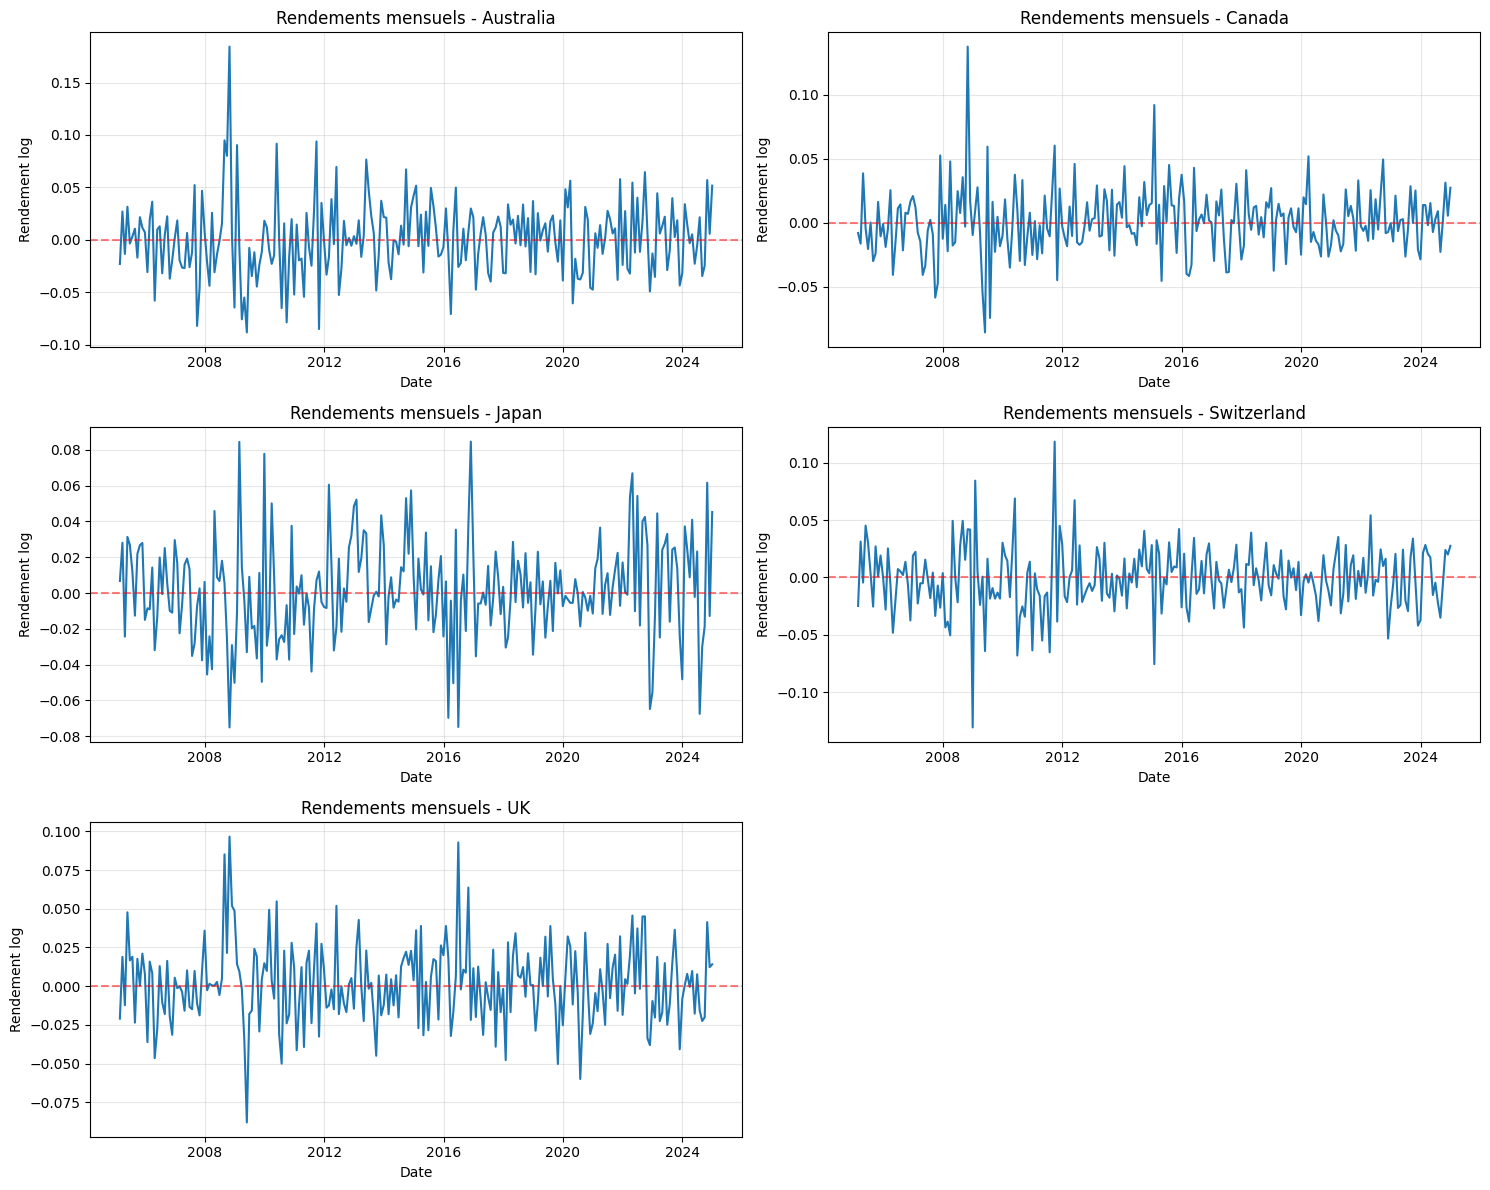

In [12]:
# Visualiser les rendements
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(returns.columns):
    axes[i].plot(returns.index, returns[col])
    axes[i].set_title(f'Rendements mensuels - {col}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Rendement log')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Masquer le dernier subplot (6ème)
axes[5].axis('off')

plt.tight_layout()
plt.show()

# Préparation des données FACTORIELLES

Facteurs recommandés
1. Facteurs de Taux d'Intérêt (ESSENTIEL)
Taux sans risque (Treasury bills, obligations gouvernementales court terme) pour chaque pays
Différentiel de taux d'intérêt entre USD et chaque devise
Justification : Le carry trade est un déterminant majeur des rendements de devises. Les investisseurs empruntent dans des devises à faible taux et investissent dans des devises à taux élevé.

2. Facteurs d'Inflation
Taux d'inflation (CPI - Consumer Price Index) pour chaque pays
Différentiel d'inflation entre USA et chaque pays
Justification : Parité du pouvoir d'achat (PPP) - les différentiels d'inflation affectent les taux de change à long terme.

3. Facteurs de Croissance Économique
Croissance du PIB (trimestrielle ou annuelle convertie en mensuelle)
Différentiel de croissance entre pays
Justification : La force économique relative influence les flux de capitaux et donc les devises.

4. Facteur de Risque Global (Market Risk)
VIX (Volatility Index) - mesure de l'aversion au risque global
Ou indice boursier américain (S&P 500) comme proxy du risque de marché
Justification : En période de stress, les investisseurs fuient vers les valeurs refuges (USD, peut-être EUR), créant un facteur commun.

5. Facteurs de Matières Premières (Important pour Brazil, Canada, Mexico)
Prix du pétrole (WTI ou Brent)
Indice des matières premières (CRB Index)
Justification : Brazil, Canada et Mexico sont des exportateurs de ressources naturelles. Leurs devises sont fortement corrélées aux prix des commodités.

6. Balance Commerciale / Compte Courant
Balance commerciale ou compte courant en % du PIB
Justification : Les flux commerciaux créent de l'offre et demande pour les devises.

🎯 Facteurs PRIORITAIRES (à télécharger absolument)
Différentiels de taux d'intérêt (carry factor)
VIX ou équivalent (risk-off factor)
Prix du pétrole (commodity factor)
Différentiels d'inflation
💡 Stratégie recommandée
Compte tenu de la nature bilatérale mentionnée dans l'introduction :

Ne pas utiliser les niveaux absolus, mais les DIFFÉRENTIELS (USA vs autre pays)
Exemple : Taux_Canada - Taux_USA, Inflation_Brazil - Inflation_USA
Cela capture l'essence bilatérale : ce qui compte, c'est la différence relative


## FACTEUR 1: Taux Intérêts

In [41]:
# Fichiers des taux d'intérêt
interest_files = {
    'USA': 'IR_US.csv',
    'Australia': 'IR_AU.csv',
    'Canada': 'IR_CA.csv',
    'Japan': 'IR_JA.csv',
    'Switzerland': 'IR_SW.csv',
    'UK': 'IR_UK.csv'
}

# Charger tous les fichiers
interest_rates = {}
for country, filename in interest_files.items():
    df = pd.read_csv(filename)
    df.columns = ['date', country]
    df['date'] = pd.to_datetime(df['date'])
    interest_rates[country] = df
    print(f"{country}: {len(df)} observations")

interest_rates

USA: 240 observations
Australia: 240 observations
Canada: 240 observations
Japan: 240 observations
Switzerland: 240 observations
UK: 240 observations


{'USA':           date   USA
 0   2005-01-01  2.61
 1   2005-02-01  2.77
 2   2005-03-01  2.97
 3   2005-04-01  3.09
 4   2005-05-01  3.22
 ..         ...   ...
 235 2024-08-01  5.12
 236 2024-09-01  4.86
 237 2024-10-01  4.62
 238 2024-11-01  4.53
 239 2024-12-01  4.46
 
 [240 rows x 2 columns],
 'Australia':           date  Australia
 0   2005-01-01       5.42
 1   2005-02-01       5.63
 2   2005-03-01       5.81
 3   2005-04-01       5.75
 4   2005-05-01       5.68
 ..         ...        ...
 235 2024-08-01       4.38
 236 2024-09-01       4.42
 237 2024-10-01       4.41
 238 2024-11-01       4.42
 239 2024-12-01       4.44
 
 [240 rows x 2 columns],
 'Canada':           date  Canada
 0   2005-01-01  2.4550
 1   2005-02-01  2.4450
 2   2005-03-01  2.4980
 3   2005-04-01  2.4700
 4   2005-05-01  2.4600
 ..         ...     ...
 235 2024-08-01  4.2325
 236 2024-09-01  4.0425
 237 2024-10-01  3.7100
 238 2024-11-01  3.4800
 239 2024-12-01  3.1950
 
 [240 rows x 2 columns],
 'Japan':    

### Étape 2 : Fusionner et calculer les différentiels

Pour avoir un facteur "carry trade", on calcule la différence entre le taux de chaque pays et le taux USA.
Formule : `Différentiel = Taux_Pays - Taux_USA`

In [42]:
# Fusionner tous les taux dans un seul DataFrame
# Commencer avec les données USA
rates_combined = interest_rates['USA'].copy()

# Ajouter les autres pays un par un
for country in ['Australia', 'Canada', 'Japan', 'Switzerland', 'UK']:
    rates_combined = rates_combined.merge(
        interest_rates[country], 
        on='date', 
        how='inner'  # ← Changé de 'outer' à 'inner'
    )

# Trier par date
rates_combined = rates_combined.sort_values('date').reset_index(drop=True)

print(f"DataFrame combiné : {len(rates_combined)} observations")
print(f"Période : {rates_combined['date'].min()} à {rates_combined['date'].max()}")
print(f"\nValeurs manquantes par pays :")
print(rates_combined.isnull().sum())

rates_combined.head()

DataFrame combiné : 240 observations
Période : 2005-01-01 00:00:00 à 2024-12-01 00:00:00

Valeurs manquantes par pays :
date           0
USA            1
Australia      0
Canada         0
Japan          0
Switzerland    0
UK             0
dtype: int64


,date,USA,Australia,Canada,Japan,Switzerland,UK
0,2005-01-01,2.61,5.42,2.455,0.10,0.651069,4.87316
1,2005-02-01,2.77,5.63,2.445,0.10,0.677186,4.89069
2,2005-03-01,2.97,5.81,2.498,0.08,0.666316,4.98736
3,2005-04-01,3.09,5.75,2.470,0.08,0.672952,4.94336
4,2005-05-01,3.22,5.68,2.460,0.08,0.670662,4.89375


In [43]:
# Supprimer les valeurs manquantes

rates_clean = rates_combined.dropna()

print(f"Avant nettoyage : {len(rates_combined)} observations")
print(f"Après nettoyage : {len(rates_clean)} observations")
print(f"Lignes supprimées : {len(rates_combined) - len(rates_clean)}")

rates_clean

Avant nettoyage : 240 observations
Après nettoyage : 239 observations
Lignes supprimées : 1


,date,USA,Australia,Canada,Japan,Switzerland,UK
0,2005-01-01,2.61,5.42,2.4550,0.100,0.651069,4.87316
1,2005-02-01,2.77,5.63,2.4450,0.100,0.677186,4.89069
2,2005-03-01,2.97,5.81,2.4980,0.080,0.666316,4.98736
3,2005-04-01,3.09,5.75,2.4700,0.080,0.672952,4.94336
4,2005-05-01,3.22,5.68,2.4600,0.080,0.670662,4.89375
...,...,...,...,...,...,...,...
235,2024-08-01,5.12,4.38,4.2325,0.255,1.066472,4.91000
236,2024-09-01,4.86,4.42,4.0425,0.256,1.022143,4.84000
237,2024-10-01,4.62,4.41,3.7100,0.256,0.894493,4.75000
238,2024-11-01,4.53,4.42,3.4800,0.362,0.806508,4.68000


In [44]:
# Calculer les DIFFÉRENTIELS de taux (Pays - USA)

interest_differentials = pd.DataFrame()
interest_differentials['date'] = rates_clean['date']

# Calculer le différentiel pour chaque pays
for country in ['Australia', 'Canada', 'Japan', 'Switzerland', 'UK']:
    interest_differentials[f'IR_diff_{country}'] = rates_clean[country] - rates_clean['USA']

print(f"\nNombre d'observations : {len(interest_differentials)}")
print("\nStatistiques descriptives des différentiels :")
print(interest_differentials.describe())
print("\n")

interest_differentials


Nombre d'observations : 239

Statistiques descriptives des différentiels :
                                date  IR_diff_Australia  IR_diff_Canada  \
count                            239         239.000000      239.000000   
mean   2014-12-08 02:54:43.682008320           1.448745       -0.188510   
min              2005-01-01 00:00:00          -1.400000       -2.764000   
25%              2009-12-16 12:00:00          -0.135000       -0.648750   
50%              2014-12-01 00:00:00           1.180000       -0.135000   
75%              2019-11-16 00:00:00           2.690000        0.245000   
max              2024-12-01 00:00:00           5.110000        0.877500   
std                              NaN           1.842689        0.646601   

       IR_diff_Japan  IR_diff_Switzerland  IR_diff_UK  
count     239.000000           239.000000  239.000000  
mean       -1.686129            -1.723972    0.146610  
min        -5.472000            -4.116522   -1.785560  
25%        -3.183000    

,date,IR_diff_Australia,IR_diff_Canada,IR_diff_Japan,IR_diff_Switzerland,IR_diff_UK
0,2005-01-01,2.81,-0.1550,-2.510,-1.958931,2.26316
1,2005-02-01,2.86,-0.3250,-2.670,-2.092814,2.12069
2,2005-03-01,2.84,-0.4720,-2.890,-2.303684,2.01736
3,2005-04-01,2.66,-0.6200,-3.010,-2.417048,1.85336
4,2005-05-01,2.46,-0.7600,-3.140,-2.549338,1.67375
...,...,...,...,...,...,...
235,2024-08-01,-0.74,-0.8875,-4.865,-4.053528,-0.21000
236,2024-09-01,-0.44,-0.8175,-4.604,-3.837857,-0.02000
237,2024-10-01,-0.21,-0.9100,-4.364,-3.725507,0.13000
238,2024-11-01,-0.11,-1.0500,-4.168,-3.723492,0.15000


#### Justification facteur
"Le différentiel de taux d'intérêt capture le facteur de carry trade, l'une des stratégies d'investissement les plus documentées sur le marché des changes. Selon la théorie de la parité des taux d'intérêt non couverte, les devises des pays offrant des taux d'intérêt plus élevés devraient se déprécier pour compenser le rendement supplémentaire. Cependant, empiriquement, ces devises tendent à s'apprécier, créant des opportunités de profit systématiques. Ce facteur mesure l'attractivité relative d'une devise en termes de rendement, ce qui influence directement les flux de capitaux internationaux et, par conséquent, les taux de change."

## FACTEUR 2: Inflation

### Facteur 2 : Différentiels de REER (Real Effective Exchange Rate)

#### 📚 Justification théorique :

**Le REER capture la Parité de Pouvoir d'Achat (PPP) et les déséquilibres de valorisation.**

**Théorie de la PPP** :
- À long terme, les taux de change devraient s'ajuster pour égaliser le pouvoir d'achat entre pays
- Si le REER d'un pays est élevé → sa devise est **surévaluée** → tendance à se déprécier
- Si le REER est bas → devise **sous-évaluée** → tendance à s'apprécier

**Pourquoi calculer un Différentiel de REER (REER_Pays - REER_USA) ?**

⚠️ **Le REER seul est déjà "objectif"** (mesuré contre un panier de devises), MAIS :

**Option A : Utiliser REER seul** ✅
- Chaque REER mesure la sur/sous-évaluation absolue
- Avantage : Déjà ajusté, pas de calcul supplémentaire
- Inconvénient : **Pas bilatéral** (mesure vs panier global, pas vs USD)

**Option B : Utiliser le Différentiel REER** ✅ (Recommandé pour cohérence)
- Mesure la **valorisation relative** spécifiquement **par rapport aux USA**
- Avantage : **Cohérent avec vos rendements de devises** (qui sont tous vs USD)
- Avantage : **Cohérent avec vos différentiels de taux** (Pays - USA)
- Capture : "Mon pays est-il plus/moins surévalué que les USA ?"

**💡 Ma recommandation** : Utilisez le **différentiel** pour garder un cadre **bilatéral cohérent** avec le reste de votre analyse. Tous vos facteurs comparent alors "Pays vs USA", ce qui facilite l'interprétation.

**Ce que ça apporte concrètement** :
1. **Facteur de valorisation** : Identifie les devises sur/sous-évaluées
2. **Tendance de réversion** : Les devises tendent à revenir vers leur PPP à long terme
3. **Orthogonal aux taux** : Le REER capture une dimension différente (réel vs nominal)
4. **Compétitivité commerciale** : Lié aux balances commerciales et flux de capitaux structurels

**Littérature académique** :
- Rogoff (1996) : "The Purchasing Power Parity Puzzle"
- Engel & West (2005) : Déviations du PPP persistent mais se résorbent
- Les hedge funds utilisent le REER pour identifier des opportunités de mean-reversion

#### 💡 En résumé :
Taux d'intérêt = **flux financiers court terme** (carry trade)  
REER = **valorisation fondamentale** (sur/sous-évaluation, ajustements structurels)